# Execicio 'A Estrela'

O objetivo desta tarefa é identificar o menor trajeto entre duas cidades, A cidade de origem é Porto União e a cidade de destino é Curitiba. No mapa abaixo você pode visualizar as distâncias pela estrada entre cada uma das cidades

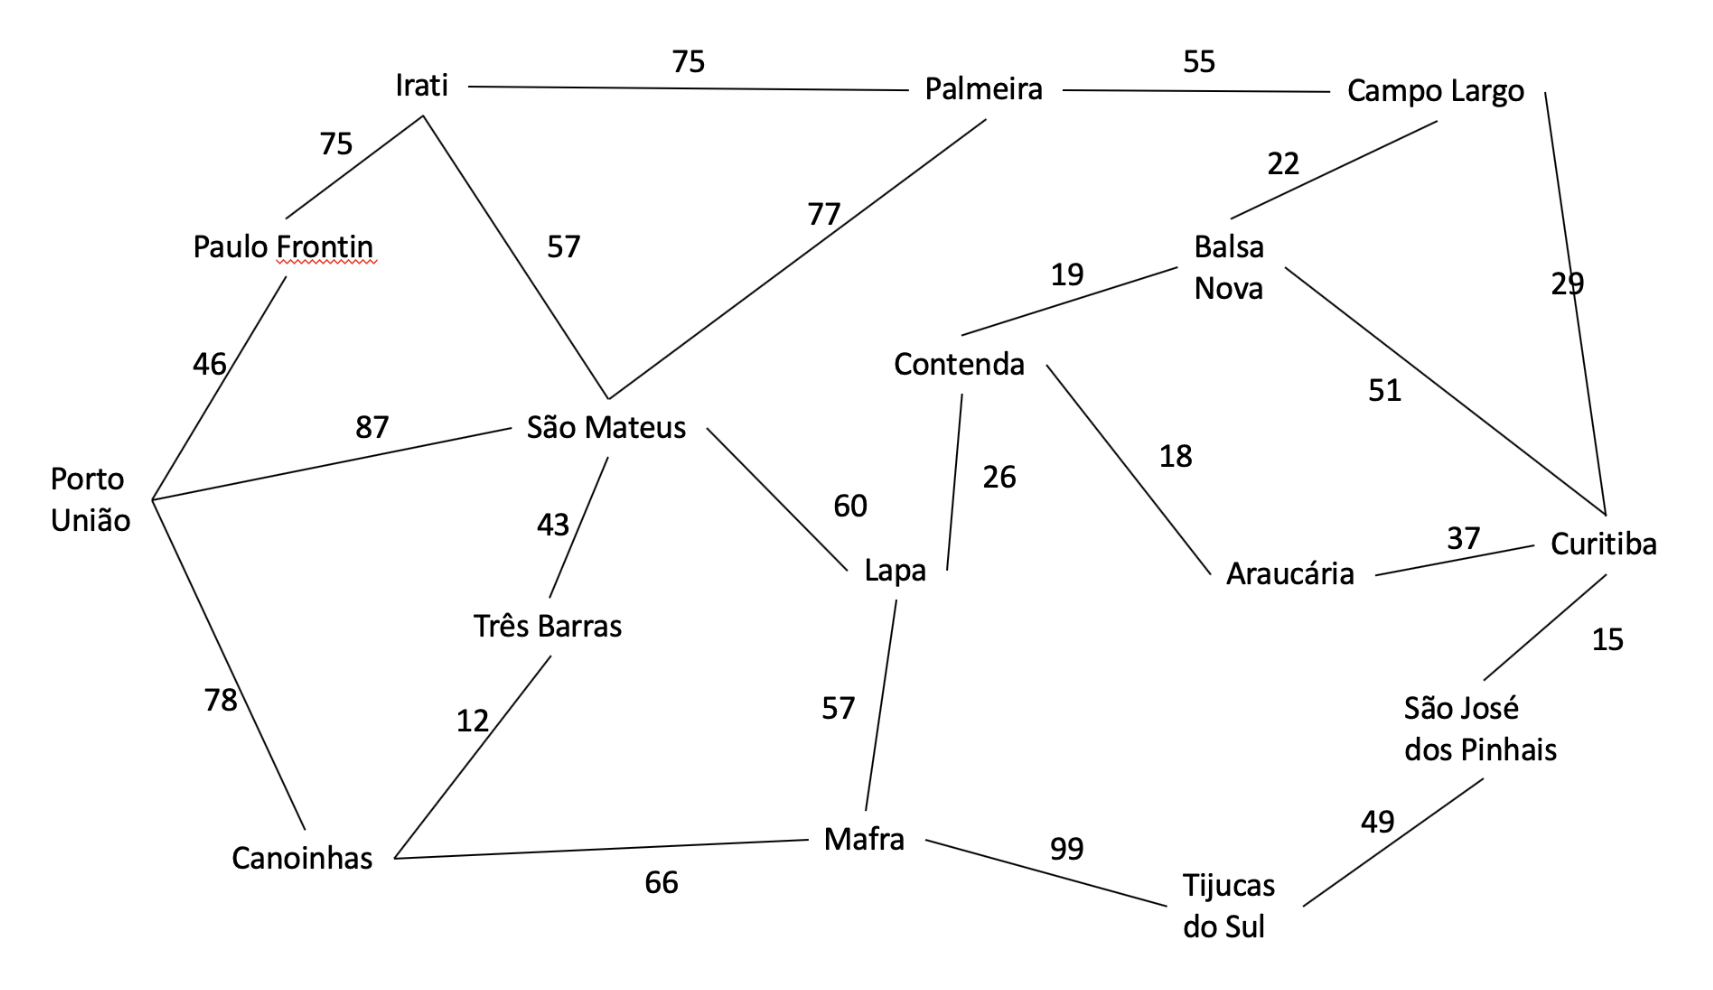

Abaixo você pode observar a tabela com as heurísticas com a distância em linha reta entre todas as cidades e o objetivo (Curitiba)

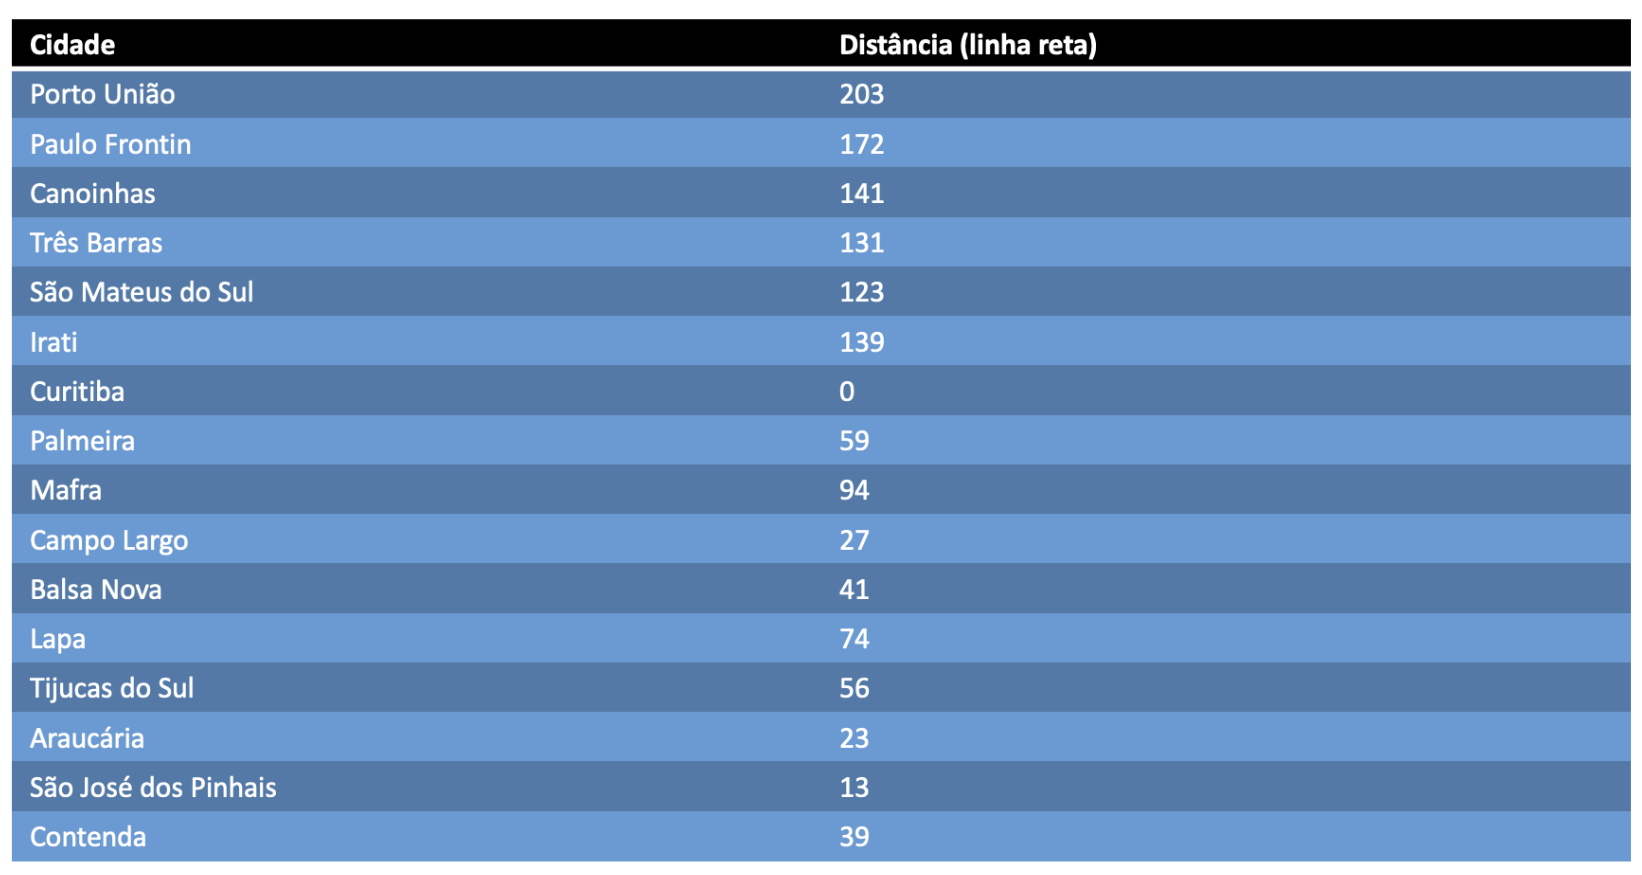

## Grafo

É uma estrutura matemática que consiste em dois conjuntos: vértices (ou nós) e arestas (ou arcos). Os grafos são usados para modelar relações entre diferentes entidades. Cada vértice representa um objeto ou entidade, enquanto cada aresta representa uma conexão ou relação entre dois vértices.

## Vértice

É um dos pontos ou nós de um grafo. Em um grafo representando cidades e estradas, por exemplo, cada cidade seria um vértice.

## Adjacente

Dois vértices são adjacentes se estiverem diretamente conectados por uma aresta. No exemplo das cidades, se houver uma estrada direta entre São Paulo e Rio de Janeiro, então esses dois vértices (cidades) são adjacentes.

In [1]:
class Vertice:

  def __init__(self, rotulo, distancia_objetivo):
    self.rotulo = rotulo
    self.visitado = False
    self.distancia_objetivo = distancia_objetivo
    self.adjacentes = []

  def adiciona_adjacente(self, adjacente):
    self.adjacentes.append(adjacente)

  def mostra_adjacentes(self):
    for i in self.adjacentes:
      print(i.vertice.rotulo, i.custo)

class Adjacente:
  def __init__(self, vertice, custo):
    self.vertice = vertice
    self.custo = custo
    self.distancia_aestrela = vertice.distancia_objetivo + self.custo

In [2]:
class Grafo:
    porto_uniao = Vertice('Porto União', 203)
    paulo_frontin = Vertice('Paulo Frontin', 172)
    canoinhas = Vertice('Canoinhas', 141)
    tres_barras = Vertice('Três Barras', 131)
    sao_mateus_do_sul = Vertice('São Mateus do Sul', 123)
    irati = Vertice('Irati', 139)
    curitiba = Vertice('Curitiba', 0)
    palmeira = Vertice('Palmeira', 59)
    campo_largo = Vertice('Campo Largo', 27)
    balsa_nova = Vertice('Balsa Nova', 41)
    lapa = Vertice('Lapa', 74)
    tijucas_do_sul = Vertice('Tijucas do Sul', 56)
    araucaria = Vertice('Araucária', 23)
    sao_jose_dos_pinhais = Vertice('São José dos Pinhais', 13)
    contenda = Vertice('Contenda', 39)
    mafra = Vertice('Mafra', 94)

    porto_uniao.adiciona_adjacente(Adjacente(paulo_frontin, 46))
    porto_uniao.adiciona_adjacente(Adjacente(canoinhas, 78))
    porto_uniao.adiciona_adjacente(Adjacente(sao_mateus_do_sul, 87))

    paulo_frontin.adiciona_adjacente(Adjacente(porto_uniao, 46))
    paulo_frontin.adiciona_adjacente(Adjacente(irati, 75))

    canoinhas.adiciona_adjacente(Adjacente(tres_barras, 12))
    canoinhas.adiciona_adjacente(Adjacente(mafra, 66))
    canoinhas.adiciona_adjacente(Adjacente(porto_uniao, 78))

    sao_mateus_do_sul.adiciona_adjacente(Adjacente(tres_barras, 43))
    sao_mateus_do_sul.adiciona_adjacente(Adjacente(irati, 57))
    sao_mateus_do_sul.adiciona_adjacente(Adjacente(lapa, 60))
    sao_mateus_do_sul.adiciona_adjacente(Adjacente(palmeira, 77))
    sao_mateus_do_sul.adiciona_adjacente(Adjacente(porto_uniao, 87))

    irati.adiciona_adjacente(Adjacente(sao_mateus_do_sul, 57))
    irati.adiciona_adjacente(Adjacente(paulo_frontin, 75))
    irati.adiciona_adjacente(Adjacente(palmeira, 75))

    palmeira.adiciona_adjacente(Adjacente(campo_largo, 55))
    palmeira.adiciona_adjacente(Adjacente(irati, 75))
    palmeira.adiciona_adjacente(Adjacente(sao_mateus_do_sul, 77))

    lapa.adiciona_adjacente(Adjacente(contenda, 26))
    lapa.adiciona_adjacente(Adjacente(mafra, 57))
    lapa.adiciona_adjacente(Adjacente(sao_mateus_do_sul, 60))

    tres_barras.adiciona_adjacente(Adjacente(canoinhas, 12))
    tres_barras.adiciona_adjacente(Adjacente(sao_mateus_do_sul, 43))

    mafra.adiciona_adjacente(Adjacente(lapa, 57))
    mafra.adiciona_adjacente(Adjacente(canoinhas, 66))
    mafra.adiciona_adjacente(Adjacente(tijucas_do_sul, 99))

    campo_largo.adiciona_adjacente(Adjacente(balsa_nova, 22))
    campo_largo.adiciona_adjacente(Adjacente(curitiba, 29))
    campo_largo.adiciona_adjacente(Adjacente(palmeira, 55))

    contenda.adiciona_adjacente(Adjacente(balsa_nova, 19))
    contenda.adiciona_adjacente(Adjacente(araucaria, 18))
    contenda.adiciona_adjacente(Adjacente(lapa, 26))

    tijucas_do_sul.adiciona_adjacente(Adjacente(sao_jose_dos_pinhais, 49))
    tijucas_do_sul.adiciona_adjacente(Adjacente(mafra, 99))

    balsa_nova.adiciona_adjacente(Adjacente(contenda, 19))
    balsa_nova.adiciona_adjacente(Adjacente(campo_largo, 22))
    balsa_nova.adiciona_adjacente(Adjacente(curitiba, 51))

    curitiba.adiciona_adjacente(Adjacente(sao_jose_dos_pinhais, 15))
    curitiba.adiciona_adjacente(Adjacente(campo_largo, 29))
    curitiba.adiciona_adjacente(Adjacente(araucaria, 37))
    curitiba.adiciona_adjacente(Adjacente(balsa_nova, 51))

    araucaria.adiciona_adjacente(Adjacente(contenda, 18))
    araucaria.adiciona_adjacente(Adjacente(curitiba, 37))

    sao_jose_dos_pinhais.adiciona_adjacente(Adjacente(curitiba, 15))
    sao_jose_dos_pinhais.adiciona_adjacente(Adjacente(tijucas_do_sul, 49))

In [3]:
grafo = Grafo()

In [4]:
import numpy as np
class VetorOrdenado:
  
  def __init__(self, capacidade):
    self.capacidade = capacidade
    self.ultima_posicao = -1
    # Mudança no tipo de dados
    self.valores = np.empty(self.capacidade, dtype=object)

  # Referência para o vértice e comparação com a distância para o objetivo
  def insere(self, adjacente):
    if self.ultima_posicao == self.capacidade - 1:
      print('Capacidade máxima atingida')
      return
    posicao = 0
    for i in range(self.ultima_posicao + 1):
      posicao = i
      if self.valores[i].distancia_aestrela > adjacente.distancia_aestrela:
        break
      if i == self.ultima_posicao:
        posicao = i + 1
    x = self.ultima_posicao
    while x >= posicao:
      self.valores[x + 1] = self.valores[x]
      x -= 1
    self.valores[posicao] = adjacente
    self.ultima_posicao += 1

  def imprime(self):
    if self.ultima_posicao == -1:
      print('O vetor está vazio')
    else:
      for i in range(self.ultima_posicao + 1):
        print(i, ' - ', self.valores[i].vertice.rotulo, ' - ', 
              self.valores[i].custo, ' - ', 
              self.valores[i].vertice.distancia_objetivo, ' - ',
              self.valores[i].distancia_aestrela)  

In [5]:
class AEstrela:
  def __init__(self, objetivo):
    self.objetivo = objetivo
    self.encontrado = False

  def buscar(self, atual):
    print('------------------')
    print('Atual: {}'.format(atual.rotulo))
    atual.visitado = True

    if atual == self.objetivo:
      self.encontrado = True
    else:
      vetor_ordenado = VetorOrdenado(len(atual.adjacentes))
      for adjacente in atual.adjacentes:
        if adjacente.vertice.visitado == False:
          adjacente.vertice.visitado = True
          vetor_ordenado.insere(adjacente)
      vetor_ordenado.imprime()

      if vetor_ordenado.valores[0] != None:
        self.buscar(vetor_ordenado.valores[0].vertice)

In [6]:
busca_aestrela = AEstrela(grafo.curitiba)
busca_aestrela.buscar(grafo.porto_uniao)

------------------
Atual: Porto União
0  -  São Mateus do Sul  -  87  -  123  -  210
1  -  Paulo Frontin  -  46  -  172  -  218
2  -  Canoinhas  -  78  -  141  -  219
------------------
Atual: São Mateus do Sul
0  -  Lapa  -  60  -  74  -  134
1  -  Palmeira  -  77  -  59  -  136
2  -  Três Barras  -  43  -  131  -  174
3  -  Irati  -  57  -  139  -  196
------------------
Atual: Lapa
0  -  Contenda  -  26  -  39  -  65
1  -  Mafra  -  57  -  94  -  151
------------------
Atual: Contenda
0  -  Araucária  -  18  -  23  -  41
1  -  Balsa Nova  -  19  -  41  -  60
------------------
Atual: Araucária
0  -  Curitiba  -  37  -  0  -  37
------------------
Atual: Curitiba
